# Plotting Notebook for CdTe Analysis

## Step 1: Loading in the FITS file, which will only be done one time

In [62]:
#we only want to load these in once, since they are large.
from astropy.io import fits

fits_file = "/Users/pet00184/FOXSI_Analysis/updated2026plotting/BerkeleyCoolingTests/Aug282025/Am241_OnAttenuatorRing/CdTe4_Am241[run820]/CdTe4/combined_skinny_foxsi_cdte4_run820_PATH2.fits.gz"

cdte_data = fits.open(fits_file)[1].data

## Step 2: Define dictionaries that describe the run of interest

In [63]:
from utils import lab_plotting as lp

SUMMARY_DICT = {
    "SaveName": '/Users/pet00184/FOXSI_Analysis/updated2026plotting/BerkeleyCoolingTests/Aug282025/Am241_OnAttenuatorRing/CdTe4_Am241[run820]/CdTe4/Images',
    "CdTe": 'CdTe4',
    "RunNumber": 820,
    "Date": 'Aug 28th, 2025',
    "Voltage": '200V',
    "Temperature": '-20ºC',
    "Source": "Am241",
    "Location": 'Berkeley Cooler Test, Am241 on Attenuator Ring',
    "ReadoutMode": lp.find_readout_mode(cdte_data),
    "PathType": 2,
}


In [73]:
PATH1_plotconfigs = {
    "FilterPseudo": False,
    "KeepSingleClump": False,
    "PedestalTopRange": 1000,
    "LivetimeTopRange": 0.00005,
    "CommonModeRange": [0, 350]
}

In [84]:
PATH2_plotconfigs = {
    "FilterPseudo": True,
    "KeepSingleClump": False,
    "SpectralEnergyRange": [5, 70],
    "LivetimeTopRange": 0.00005
}

In [66]:
GAIN_plotconfigs = {
    "FilterPseudo": True,
    "KeepSingleClump": False
}

In [68]:
CHARGE_plotconfigs = {
    "FilterPseudo": True,
    "EnergyRange": [5, 70]
}

In [82]:
# this will be changed depending on if I am doing just path1 or all paths
full_dict = {
    "Summary": SUMMARY_DICT,
    "PATH1": PATH1_plotconfigs, 
    "PATH2": PATH2_plotconfigs,
    "Gain Shifting": GAIN_plotconfigs,
    "Charge Sharing": CHARGE_plotconfigs
}

## Step 3: Run everything

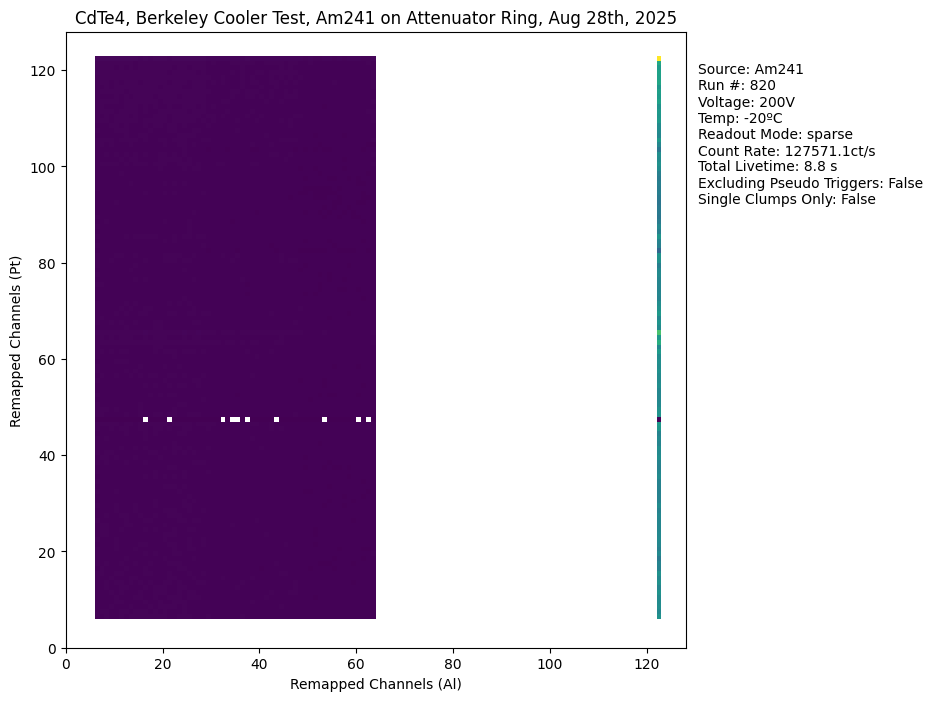

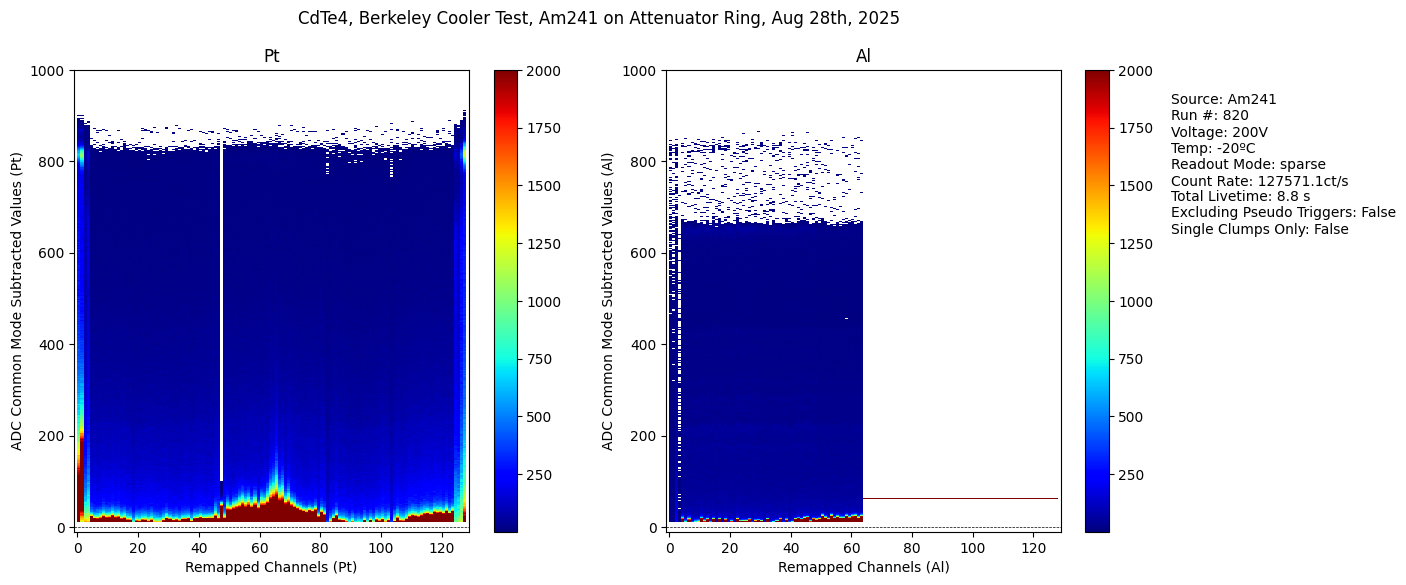

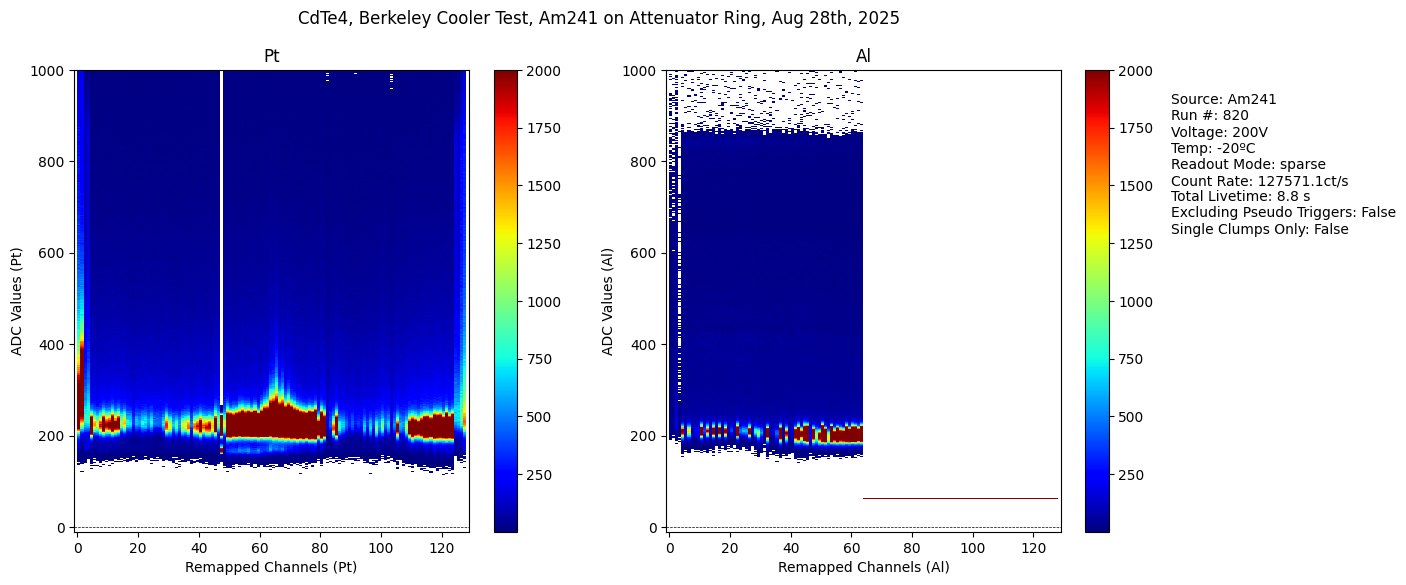

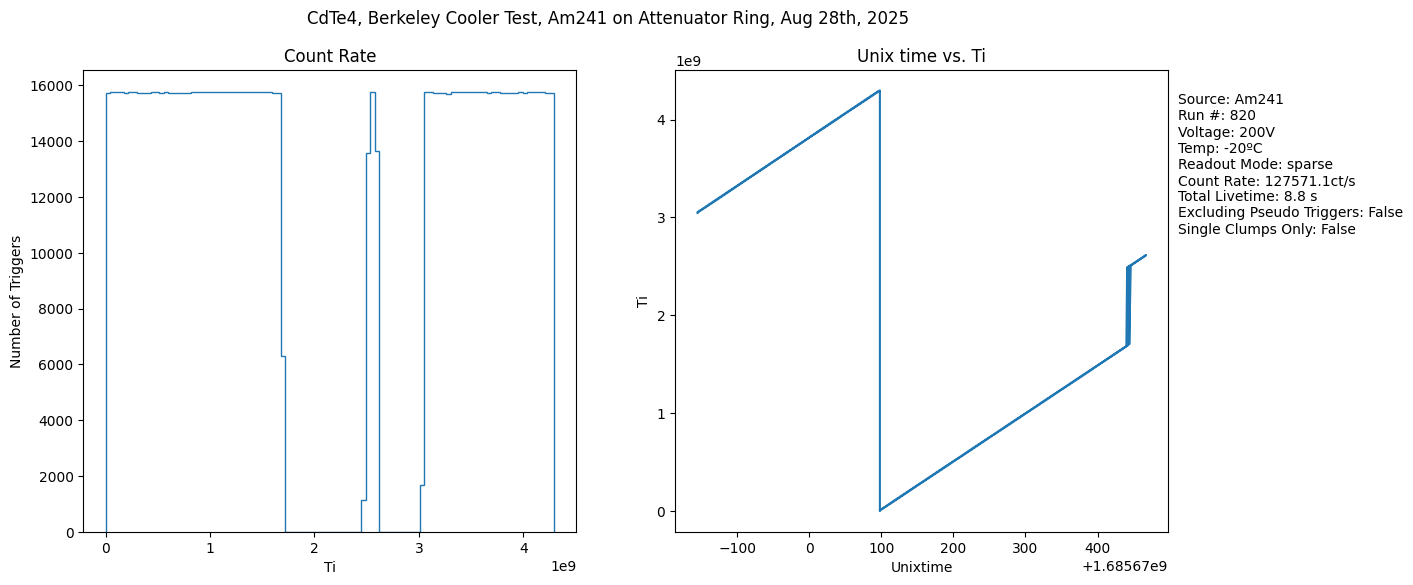

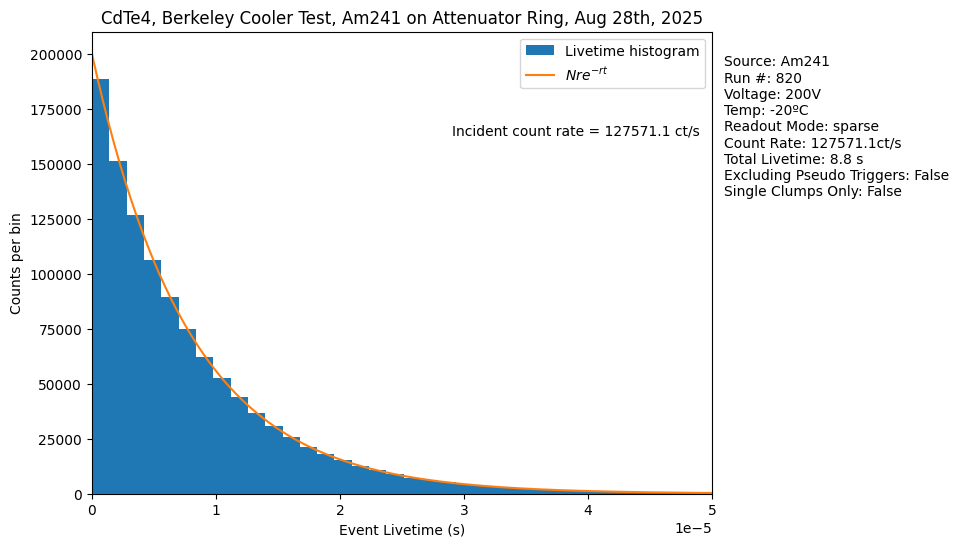

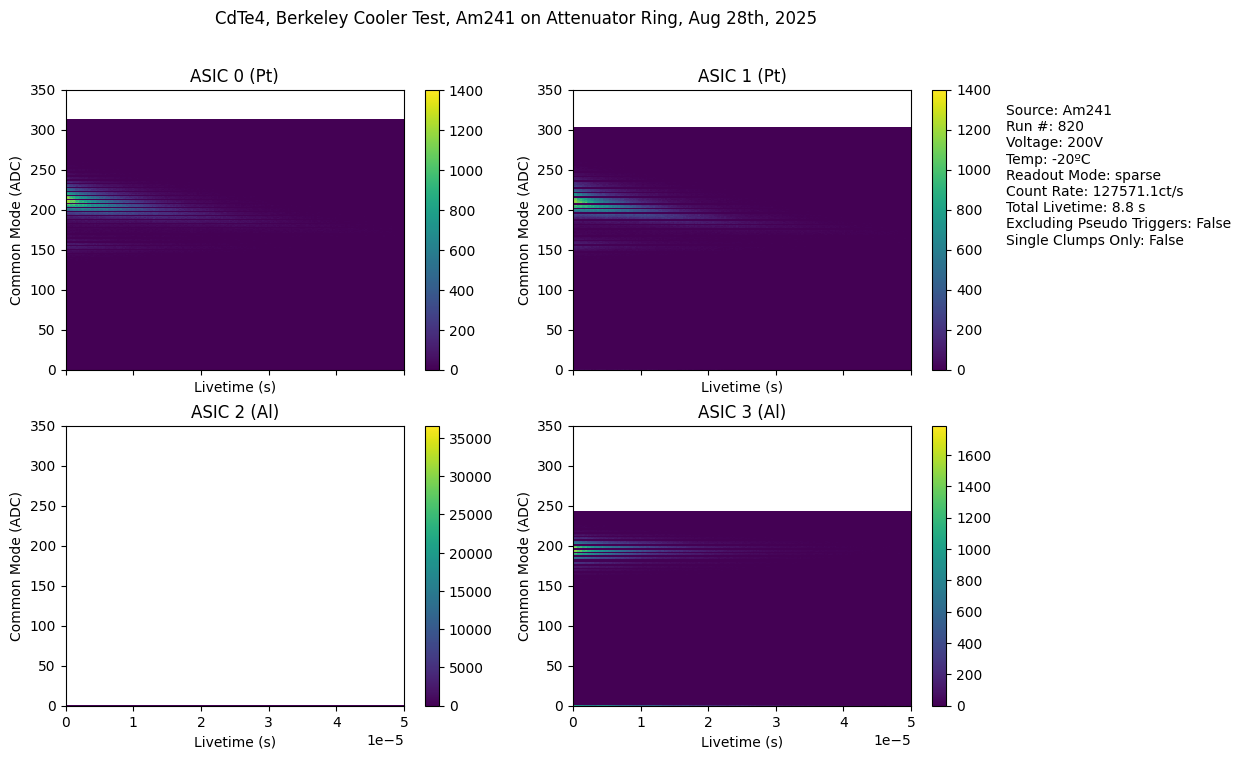

In [76]:
from utils import run_lab_plotting as rlp
import importlib
importlib.reload(rlp)

rlp.make_path1_plots(cdte_data, SUMMARY_DICT, PATH1_plotconfigs)

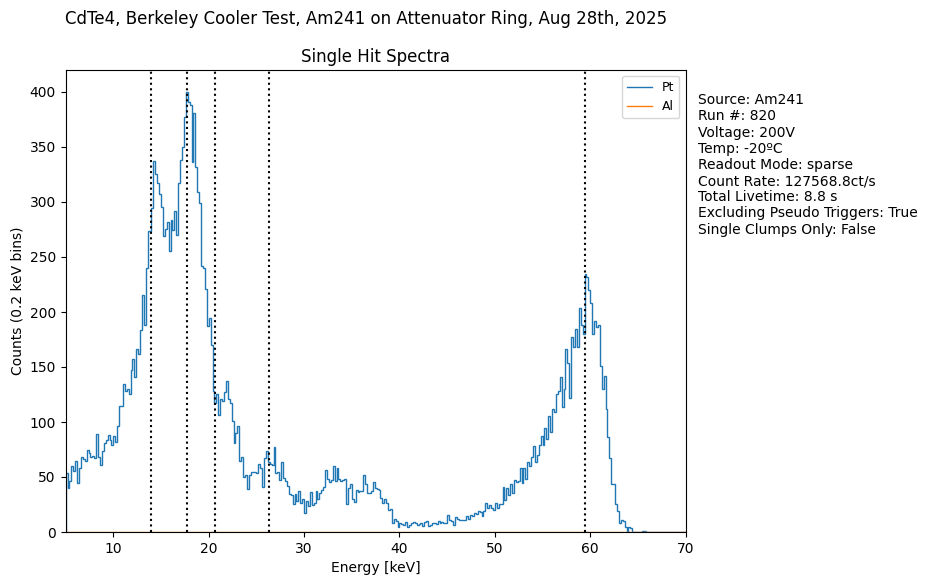

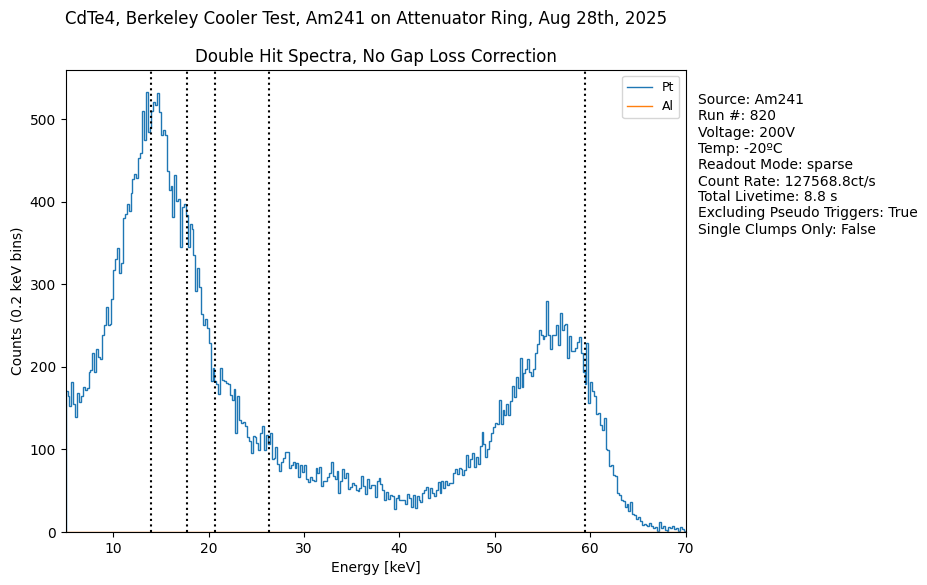

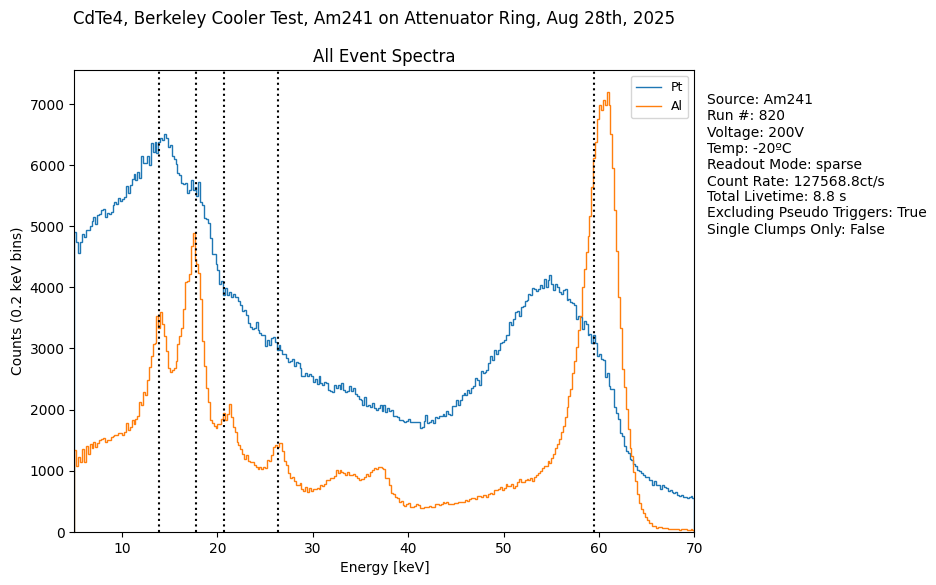

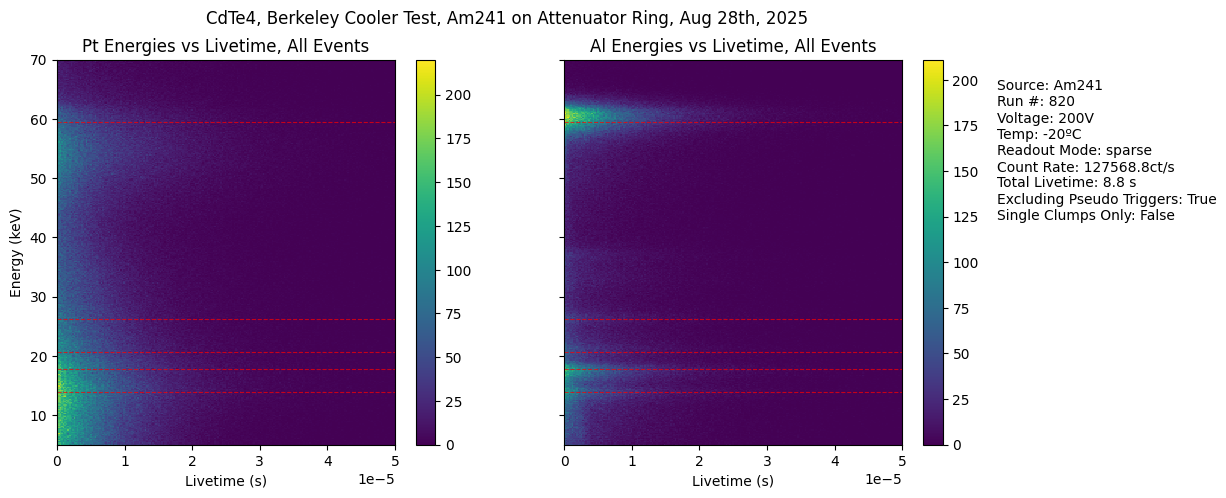

In [85]:
rlp.make_path2_plots(cdte_data, SUMMARY_DICT, PATH2_plotconfigs)

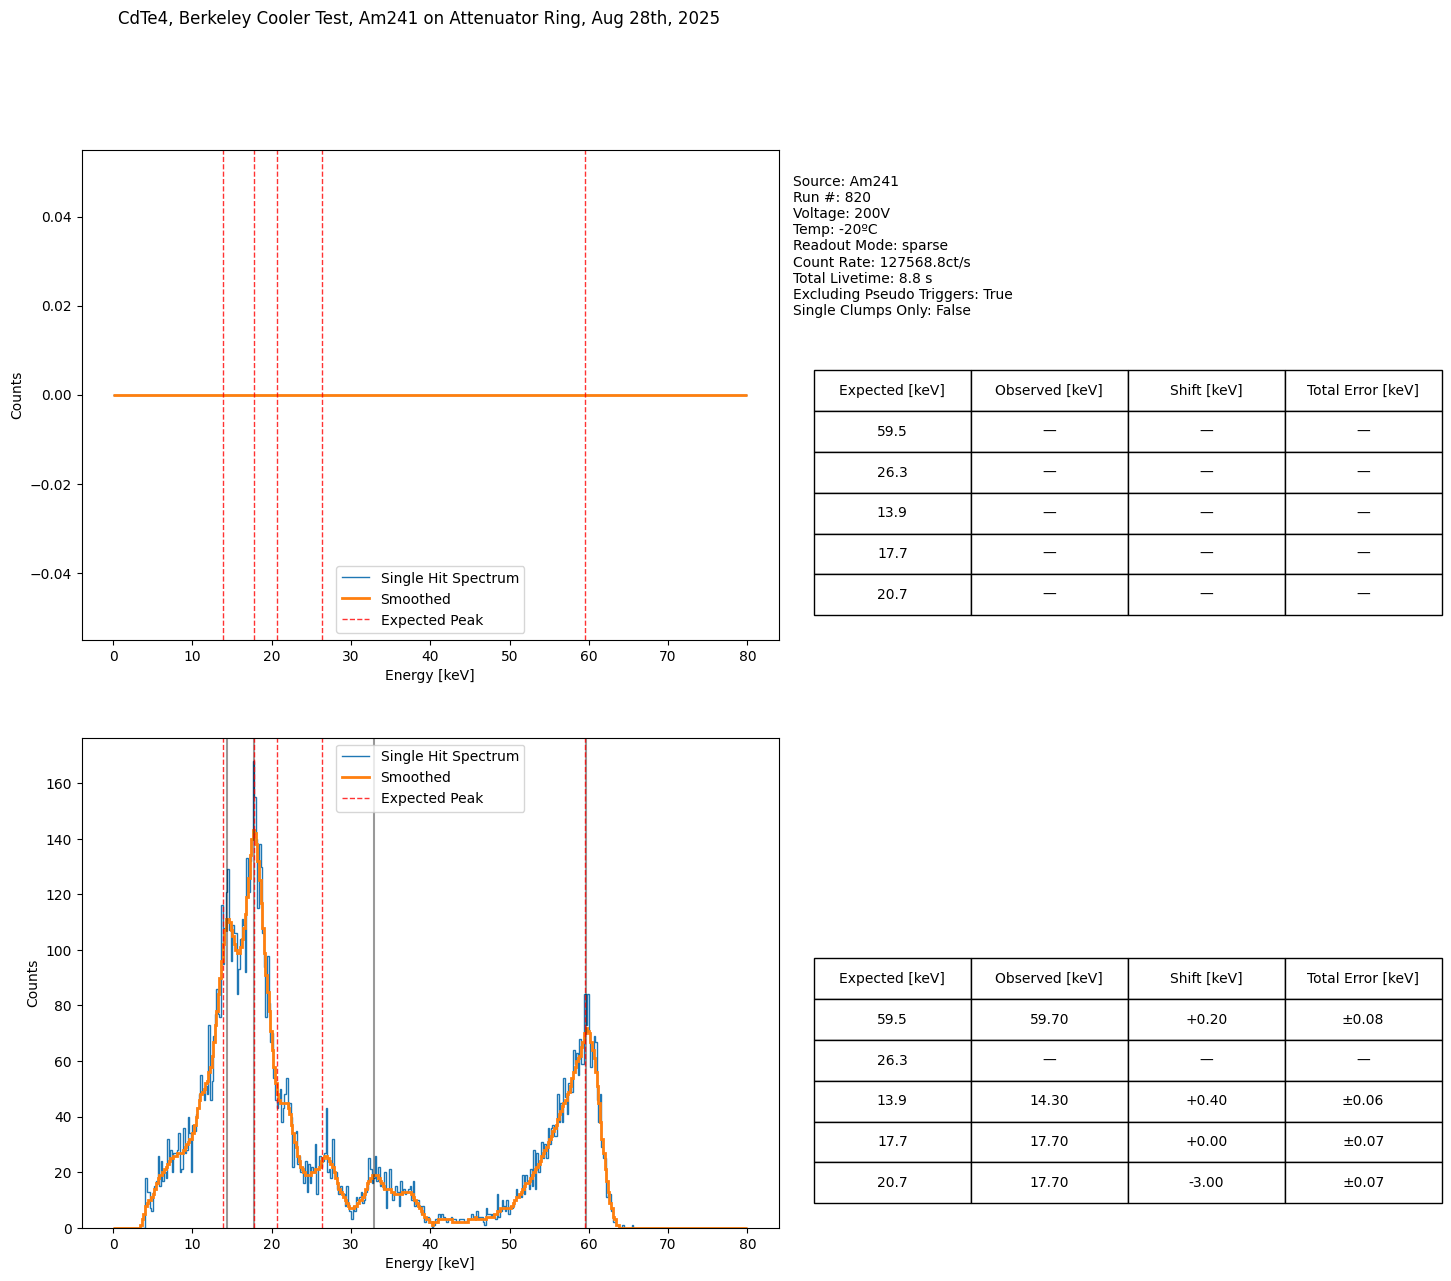

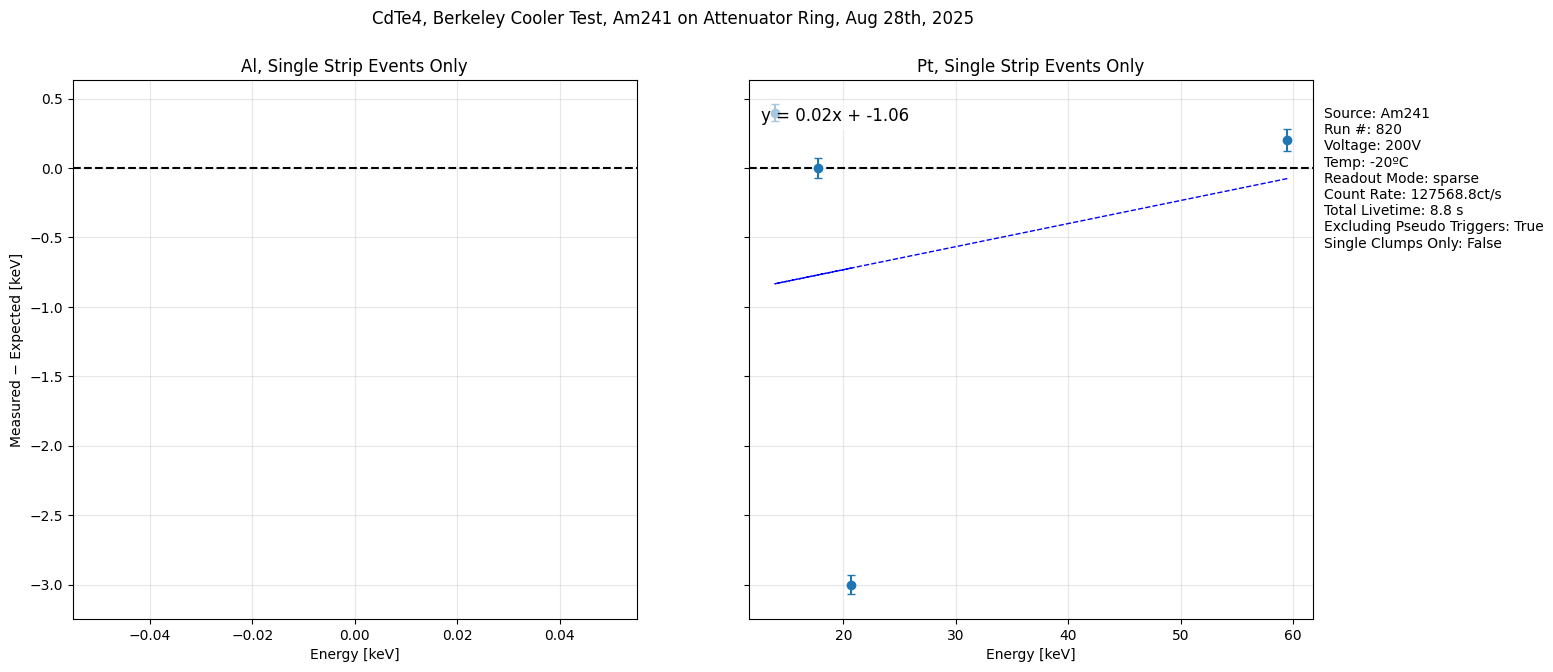

In [79]:
rlp.make_gainshit_plots(cdte_data, SUMMARY_DICT, GAIN_plotconfigs)

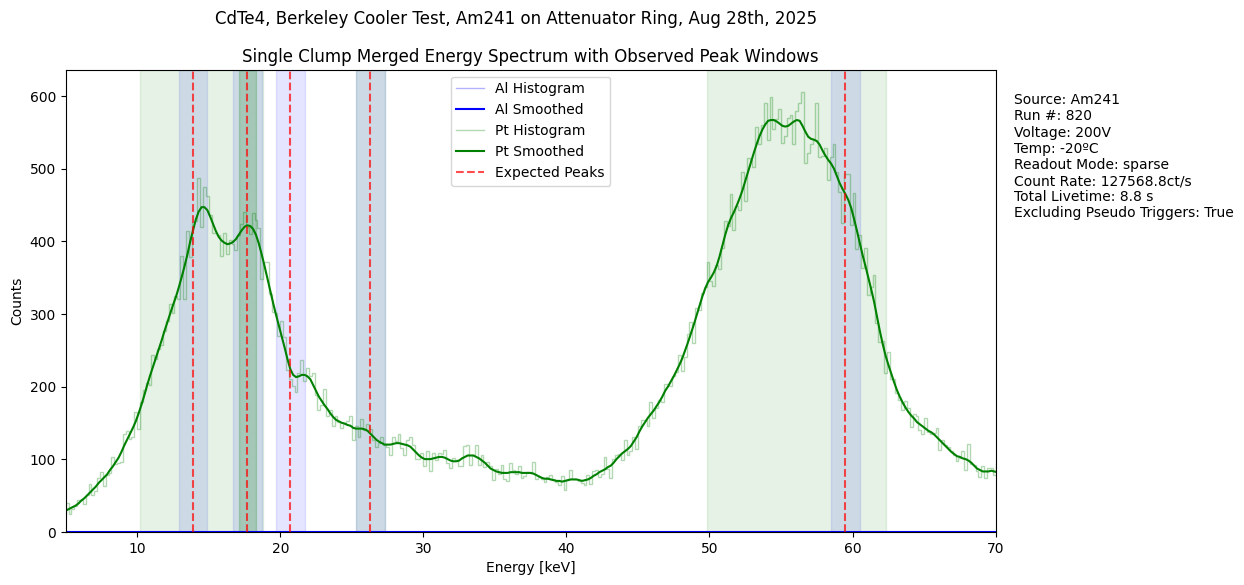

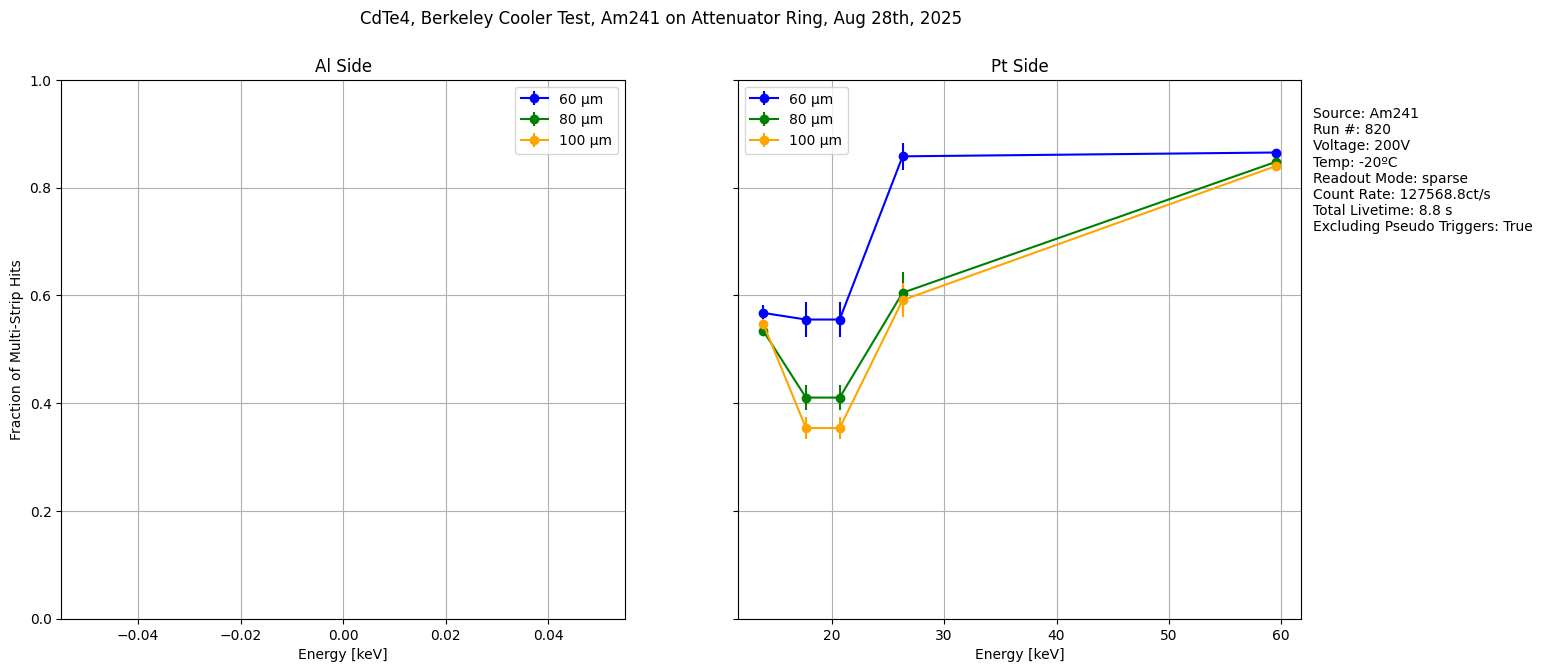

In [80]:
rlp.make_chargesharing_plots(cdte_data, SUMMARY_DICT, CHARGE_plotconfigs)

In [19]:
import os
savename = os.path.join(SUMMARY_DICT["SaveName"], f'run{SUMMARY_DICT["RunNumber"]}')
os.makedirs(savename, exist_ok=True)
filename = f'{savename}_summary.txt'
rlp.write_cdte_run_txt(filename, full_dict)

Run report written to /Users/pet00184/FOXSI_Analysis/updated2026plotting/BerkeleyCoolingTests/Aug282025/CdTe4Fe55/Images/run800_summary.txt
